In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
df = pd.read_csv('movies4_df.csv', index_col = 'title')

In [3]:
df.head()

,Action,Adventure,Animation,Budget,Comedy,Crime,Domestic Opening,Drama,Family,Fantasy,...,Other_Genres,Romance,Running Time,Science fiction,Thriller,Year of Release,Rating_G,Rating_PG,Rating_PG-13,Rating_R
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.0,1.0,0.0,237000000,0.0,0.0,77025481,0.0,0.0,1.0,...,0.0,0.0,162.0,1.0,0.0,2009,0,0,1,0
Avengers: Endgame,1.0,1.0,0.0,356000000,0.0,0.0,357115007,1.0,0.0,0.0,...,0.0,0.0,181.0,1.0,0.0,2019,0,0,1,0
Titanic,0.0,0.0,0.0,200000000,0.0,0.0,28638131,1.0,0.0,0.0,...,0.0,1.0,194.0,0.0,0.0,1997,0,0,1,0
Star Wars: Episode VII - The Force Awakens,1.0,1.0,0.0,245000000,0.0,0.0,247966675,0.0,0.0,0.0,...,0.0,0.0,138.0,1.0,0.0,2015,0,0,1,0
Jurassic World,1.0,1.0,0.0,150000000,0.0,0.0,208806270,0.0,0.0,0.0,...,0.0,0.0,124.0,1.0,0.0,2015,0,0,1,0


In [4]:
df.shape

(800, 21)

In [129]:
df['Original Release Gross Worldwide'].describe()

count    8.000000e+02
mean     3.920248e+08
std      2.882361e+08
min      5.270083e+07
25%      2.128418e+08
50%      2.935088e+08
75%      4.609338e+08
max      2.797501e+09
Name: Original Release Gross Worldwide, dtype: float64

In [5]:
#sns.pairplot(df, height = 1.5)

In [125]:
df.columns

Index(['Action', 'Adventure', 'Animation', 'Budget', 'Comedy', 'Crime',
       'Domestic Opening', 'Drama', 'Family', 'Fantasy',
       'Original Release Gross Worldwide', 'Other_Genres', 'Romance',
       'Running Time', 'Science fiction', 'Thriller', 'Year of Release',
       'Rating_G', 'Rating_PG', 'Rating_PG-13', 'Rating_R'],
      dtype='object')

## Setting up the model

In [6]:
X = df[df.columns.difference(['Original Release Gross Worldwide'])]
y = df['Original Release Gross Worldwide']

In [7]:
#Split the data 80 - 20 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Standard Scaling

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [10]:
X_tr = std.transform(X_train.values)

In [11]:
X_te = std.transform(X_test.values)

In [12]:
type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

### Test Lasso Model

In [13]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [14]:
list(zip(X_train.columns, lasso_model.coef_))

[('Action', -4129132.2035605484),
 ('Adventure', 25396276.63397882),
 ('Animation', 31809268.499909718),
 ('Budget', 24852466.538892727),
 ('Comedy', 1052001.641540405),
 ('Crime', -8038733.966054571),
 ('Domestic Opening', 201050704.8265791),
 ('Drama', 11549164.18512151),
 ('Family', -7692659.413692976),
 ('Fantasy', 7606703.036781987),
 ('Other_Genres', -5231023.452616405),
 ('Rating_G', 4042742.331677951),
 ('Rating_PG', -20435512.850153852),
 ('Rating_PG-13', -23899965.86978609),
 ('Rating_R', -25655457.855853062),
 ('Romance', -1053276.9209926522),
 ('Running Time', 43196736.46239546),
 ('Science fiction', -18063562.3565974),
 ('Thriller', -5859743.906056961),
 ('Year of Release', 12668906.40817088)]

In [15]:
## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

## Regularization Strength Tuning with cross_validation

In [16]:
alphavec = 10**np.linspace(-10,10,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.50854796474409e+16, tolerance: 4596848472146653.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.289669433074135e+17, tolerance: 4596848472146653.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3887467826355814e+17, tolerance: 4596848472146653.0
  model = cd_fast.enet_coordinate_des

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1012214495829197e+17, tolerance: 4594544271013550.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.761496845403435e+18, tolerance: 4594544271013550.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.976655015860146e+18, tolerance: 4594544271013550.0
  model = cd_fast.enet_coordinate_de

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.057374375551137e+18, tolerance: 4846797180467194.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4679387086253967e+18, tolerance: 4846797180467194.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.307404741102754e+18, tolerance: 4846797180467194.0
  model = cd_fast.enet_coordinate_de

LassoCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.28989026e-0...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
        cv=5)

In [17]:
optimal_alpha = lasso_model.alpha_
optimal_alpha

1516716.888470924

In [18]:
standard_coeffs = list(zip(X_train.columns, lasso_model.coef_))

In [19]:
lasso_model = Lasso(alpha = optimal_alpha)
lasso_model.fit(X_tr, y_train)

Lasso(alpha=1516716.888470924)

In [20]:
lasso_model.score(X_tr, y_train)

0.6745933170079262

In [21]:
lasso_model.score(X_te, y_test)

0.6024614394438617

In [22]:
test_set_pred = lasso_model.predict(X_te)

In [23]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

114845151.14295869

In [24]:
r2_score(y_test, test_set_pred)

0.6024614394438617

In [25]:
residuals = y_test - test_set_pred

In [26]:
import scipy.stats as stats

def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

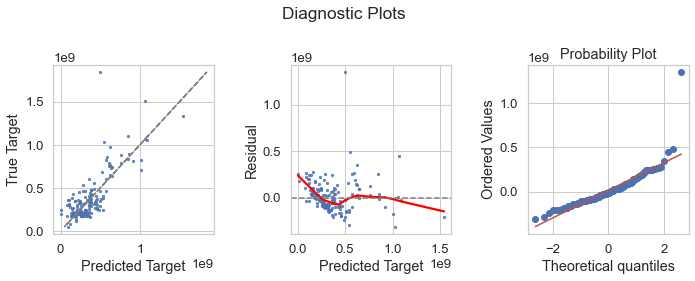

In [27]:
diagnostic_plots(test_set_pred, y_test, residuals)

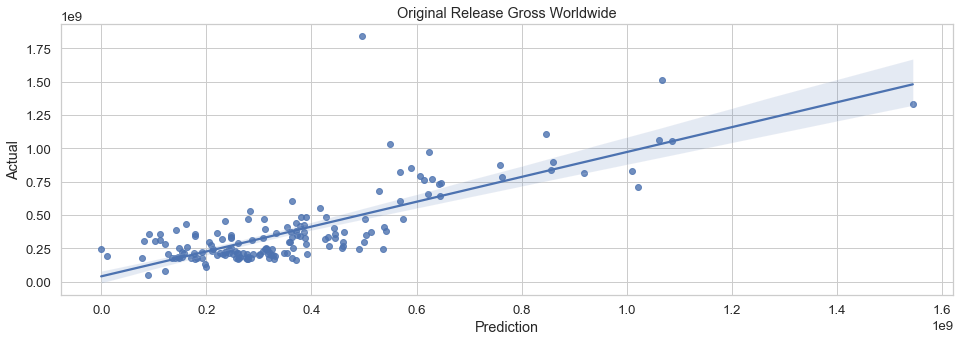

In [127]:
plt.figure(1,figsize=(16,5))
fig = sns.regplot(x = test_set_pred, y = y_test)
fig.set(xlabel='Prediction',ylabel = 'Actual', title = 'Original Release Gross Worldwide')
plt.savefig('Actualvsprediction.png')

<AxesSubplot:ylabel='Original Release Gross Worldwide'>

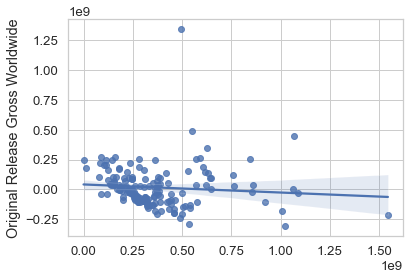

In [29]:
sns.regplot(x = test_set_pred, y = residuals)

In [30]:
standard_coeffs

[('Action', -1839306.199494137),
 ('Adventure', 26359940.429126143),
 ('Animation', 29854441.51966838),
 ('Budget', 22282534.724680465),
 ('Comedy', 0.0),
 ('Crime', -6675980.787431181),
 ('Domestic Opening', 199999575.24430412),
 ('Drama', 9712645.968117911),
 ('Family', 0.0),
 ('Fantasy', 5394236.9731556),
 ('Other_Genres', -2362842.5829804456),
 ('Rating_G', 6674907.131007615),
 ('Rating_PG', -4307267.953900343),
 ('Rating_PG-13', -662172.5082147934),
 ('Rating_R', -5964045.005898917),
 ('Romance', 0.0),
 ('Running Time', 41851351.03422188),
 ('Science fiction', -15561996.733707618),
 ('Thriller', -5747467.361104509),
 ('Year of Release', 7389869.0073460415)]

In [31]:
st_coeff_dict = {}
for items in standard_coeffs:
    st_coeff_dict[items[0]] = items[1]

In [32]:
st_coeff_dict 

{'Action': -1839306.199494137,
 'Adventure': 26359940.429126143,
 'Animation': 29854441.51966838,
 'Budget': 22282534.724680465,
 'Comedy': 0.0,
 'Crime': -6675980.787431181,
 'Domestic Opening': 199999575.24430412,
 'Drama': 9712645.968117911,
 'Family': 0.0,
 'Fantasy': 5394236.9731556,
 'Other_Genres': -2362842.5829804456,
 'Rating_G': 6674907.131007615,
 'Rating_PG': -4307267.953900343,
 'Rating_PG-13': -662172.5082147934,
 'Rating_R': -5964045.005898917,
 'Romance': 0.0,
 'Running Time': 41851351.03422188,
 'Science fiction': -15561996.733707618,
 'Thriller': -5747467.361104509,
 'Year of Release': 7389869.0073460415}

In [33]:
coeff_df = pd.DataFrame.from_dict(st_coeff_dict, orient='index', columns = ['st_coeff'])

In [34]:
coeff_df

,st_coeff
Action,-1.839306e+06
Adventure,2.635994e+07
Animation,2.985444e+07
Budget,2.228253e+07
Comedy,0.000000e+00
Crime,-6.675981e+06
Domestic Opening,1.999996e+08
Drama,9.712646e+06
Family,0.000000e+00
Fantasy,5.394237e+06


In [35]:
coeff_df.reset_index(inplace= True)

In [36]:
coeff_df.rename(columns={'index':'Feature'}, inplace = True)

In [37]:
coeff_df

,Feature,st_coeff
0,Action,-1.839306e+06
1,Adventure,2.635994e+07
2,Animation,2.985444e+07
3,Budget,2.228253e+07
4,Comedy,0.000000e+00
5,Crime,-6.675981e+06
6,Domestic Opening,1.999996e+08
7,Drama,9.712646e+06
8,Family,0.000000e+00
9,Fantasy,5.394237e+06


In [106]:
coeff_df['coeff'] = coeff_df['st_coeff'] * y.std()

In [113]:
coeff_df

,Feature,st_coeff,coeff
6,Domestic Opening,1.999996e+08,5.764710e+16
16,Running Time,4.185135e+07,1.206307e+16
2,Animation,2.985444e+07,8.605128e+15
1,Adventure,2.635994e+07,7.597886e+15
3,Budget,2.228253e+07,6.422631e+15
7,Drama,9.712646e+06,2.799535e+15
19,Year of Release,7.389869e+06,2.130027e+15
11,Rating_G,6.674907e+06,1.923949e+15
9,Fantasy,5.394237e+06,1.554814e+15
13,Rating_PG-13,-6.621725e+05,-1.908620e+14


In [107]:
coeff_df = coeff_df[coeff_df['st_coeff'] != 0]

In [108]:
coeff_df.sort_values(by = 'st_coeff', ascending = False, inplace = True)

<AxesSubplot:xlabel='Feature', ylabel='st_coeff'>

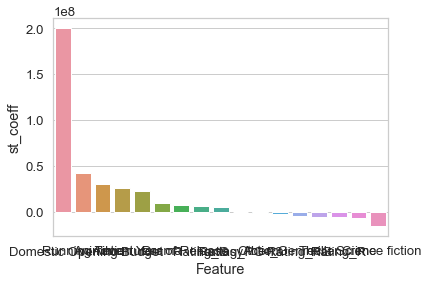

In [109]:
sns.barplot(x=coeff_df['Feature'], y=coeff_df['st_coeff'])

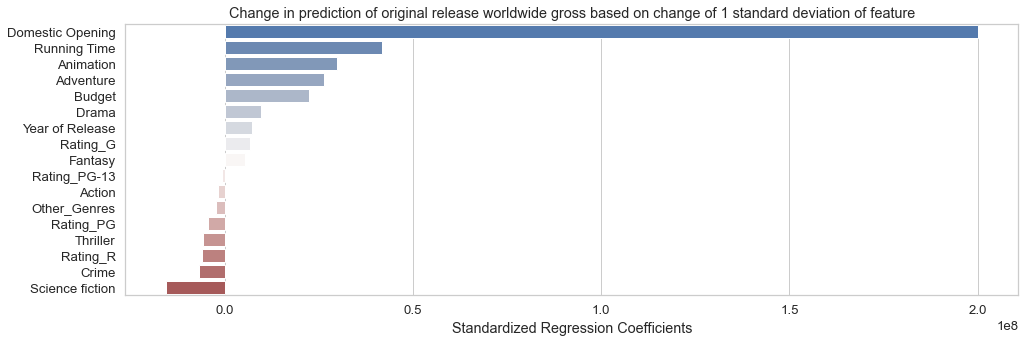

In [130]:
plt.figure(1,figsize=(16,5))
fig = sns.barplot(x=coeff_df['st_coeff'], y=coeff_df['Feature'], palette="vlag")
fig.set(xlabel='Standardized Regression Coefficients',ylabel = '', 
        title = 'Change in prediction of original release worldwide gross \
based on change of 1 standard deviation of feature')
plt.savefig('coefficients.png')

[Text(0.5, 0, 'Change in '),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Change in prediction of original release worldwide gross based on change of 1 standard deviation of feature')]

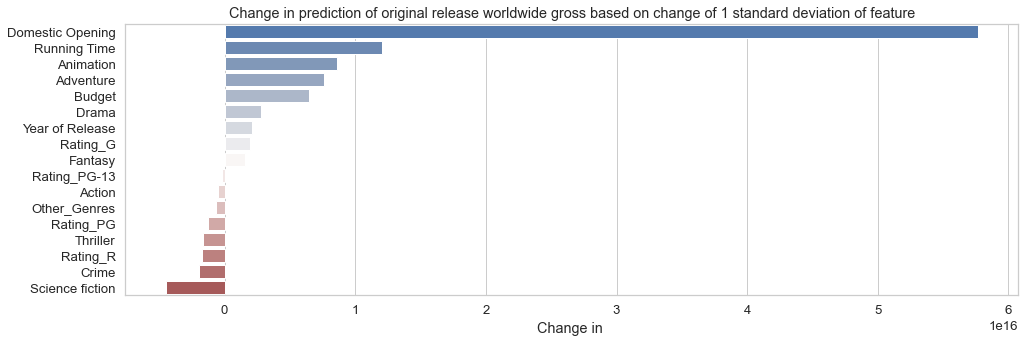

In [118]:
plt.figure(1,figsize=(16,5))
fig = sns.barplot(x=coeff_df['coeff'], y=coeff_df['Feature'], palette="vlag")
fig.set(xlabel='Change in ',ylabel = '', title = 'Change in prediction of original release worldwide \
                                                    gross based on change of 1 standard deviation of feature')

In [117]:
def get_real_coefficients(row):
    row['real_coeff'] = row['coeff'] / df[row['Feature']].std()
    return row

In [120]:
coeff_df.apply(get_real_coefficients, axis = 1)

,Feature,st_coeff,coeff,real_coeff
6,Domestic Opening,1.999996e+08,5.764710e+16,1.622230e+09
16,Running Time,4.185135e+07,1.206307e+16,5.774105e+14
2,Animation,2.985444e+07,8.605128e+15,2.425172e+16
1,Adventure,2.635994e+07,7.597886e+15,1.518860e+16
3,Budget,2.228253e+07,6.422631e+15,1.072598e+08
7,Drama,9.712646e+06,2.799535e+15,5.967462e+15
19,Year of Release,7.389869e+06,2.130027e+15,2.517847e+14
11,Rating_G,6.674907e+06,1.923949e+15,1.651114e+16
9,Fantasy,5.394237e+06,1.554814e+15,3.526127e+15
13,Rating_PG-13,-6.621725e+05,-1.908620e+14,-3.818722e+14
